In [1]:
from radd import build, models, fit, vis
from radd.toolbox import theta

In [2]:
d = 'ELife/FinalDI/xiact'
if not os.path.isdir(pth+d):
      os.mkdir(pth+d)
os.chdir(pth+d)

In [3]:
m = build.Model(data=redata, kind='xiact', dynamic='hyp', tb=.650, depends_on={'v':'Cond'})

m.flat_y=m.avg_y[0]
m.flat_wts=m.avg_wts[0]

m.make_optimizer(tol=1.e-5, multiopt=True, maxfev=5000, ntrials=10000)
opt=m.opt
opt.make_simulator()

opt.flat_y=m.avg_y[0]
opt.flat_wts=m.avg_wts[0]
opt.fitparams['flat_y']=m.avg_y[0]
opt.fitparams['flat_wts']=m.avg_wts[0]

In [4]:
fp = opt.fitparams
# p0: (Initials/Global Minimum)
p0 = dict(deepcopy(opt.inits))
p0X = opt.hop_around(p0)
yh1, finfo1, p1 = opt.gradient_descent(y=opt.flat_y, wts=opt.flat_wts, inits=p0X, is_flat=True)

basinhopping step 0: f 0.137308
basinhopping step 1: f 0.0171193 trial_f 0.0171193 accepted 1  lowest_f 0.0171193
found new global minimum on step 1 with function value 0.0171193
basinhopping step 2: f 0.690965 trial_f 0.690965 accepted 1  lowest_f 0.0171193
basinhopping step 3: f 1.64796 trial_f 1.64796 accepted 1  lowest_f 0.0171193
basinhopping step 4: f 1.40695 trial_f 1.40695 accepted 1  lowest_f 0.0171193
basinhopping step 5: f 0.188447 trial_f 0.188447 accepted 1  lowest_f 0.0171193
basinhopping step 6: f 0.145484 trial_f 0.145484 accepted 1  lowest_f 0.0171193
basinhopping step 7: f 0.145484 trial_f 1.01594 accepted 0  lowest_f 0.0171193
basinhopping step 8: f 0.216829 trial_f 0.216829 accepted 1  lowest_f 0.0171193
basinhopping step 9: f 1.13729 trial_f 1.13729 accepted 1  lowest_f 0.0171193
adaptive stepsize: acceptance rate 0.800000 target 0.500000 new stepsize 0.0555556 old stepsize 0.05
basinhopping step 10: f 0.099925 trial_f 0.099925 accepted 1  lowest_f 0.0171193
basinh

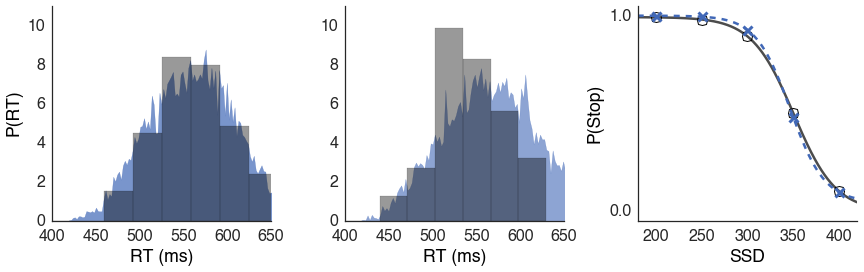

In [32]:
finfo1.to_csv('finfo.csv')
m.fits=np.tile(yh1,2).reshape(2,16)
m.popt=p1
vis.react_fit_plots(m, is_flat=True, save=True)